## 1. Wheat Seeds Dataset

In diesem Datensatz wurde die Struktur drei verschiedener Arten Weizenkörner mit Hilfe von Röntgenstrahlen analysiert. Bei den Weizenarten handelt es sich um Kama, Rosa und kanadischem Weizen. Jede der drei Klassen besteht aus 70 Instanzen.

Zunächst wollen wir eine Mehrklassen-Klassifikation auf den Datensatz anwenden.

1. Kama
<img src="https://justkama.eu/wp-content/uploads/Rokis-1024x1024.jpg" alt= “” width="200" height="200">
2. Rosa
<img src="https://wl-img-prd.s3-accelerate.amazonaws.com/a67ddae8-e16b-424b-a64e-fff80ec5e99c-h.jpeg" alt= “” width="200" height="200">
3. Kanadischer Weizen
<img src="https://cerealscanada.ca/wp-content/uploads/2022/01/cwad.png" alt= “” width="200" height="200">

### Initiales Setup & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

seed_data = pd.read_csv("seed-data.csv", sep=",")


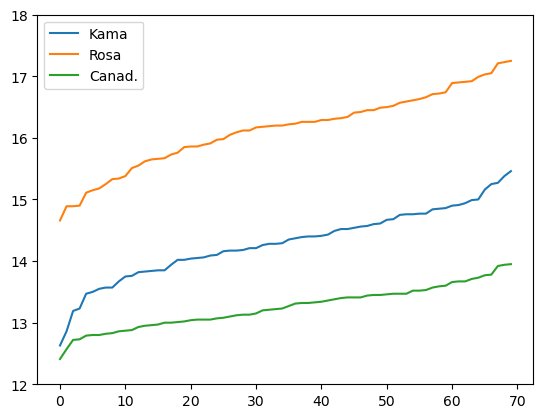

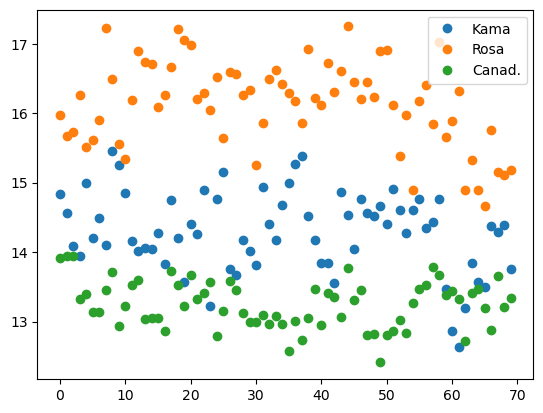

In [2]:
kama = seed_data[:70];
rosa = seed_data[70:140];
cana = seed_data[140:210];
plt.ylim(12, 18)
plt.plot(kama.Perimeter.sort_values().reset_index(drop=True))
plt.plot(rosa.Perimeter.sort_values().reset_index(drop=True))
plt.plot(cana.Perimeter.sort_values().reset_index(drop=True))
plt.legend(["Kama","Rosa","Canad."])
plt.show()

plt.plot(kama.Perimeter.reset_index(drop=True), 'o')
plt.plot(rosa.Perimeter.reset_index(drop=True), 'o')
plt.plot(cana.Perimeter.reset_index(drop=True), 'o')
plt.legend(["Kama","Rosa","Canad."])
plt.show()

In [3]:
print(kama.describe())
print(rosa.describe())
print(cana.describe())

            Area  Perimeter  Compactness  Lenght of Kernel  Width of Kernel  \
count  70.000000  70.000000    70.000000         70.000000        70.000000   
mean   14.334429  14.294286     0.880070          5.508057         3.244629   
std     1.215704   0.576583     0.016191          0.231508         0.177616   
min    11.230000  12.630000     0.839200          4.902000         2.850000   
25%    13.750000  13.960000     0.868850          5.384500         3.134250   
50%    14.355000  14.320000     0.880500          5.534000         3.243500   
75%    15.045000  14.732500     0.890400          5.677000         3.378500   
max    17.080000  15.460000     0.918300          6.053000         3.683000   

       Asymmetry Coefficient  Length of Kernel Groove  target  
count              70.000000                70.000000    70.0  
mean                2.667403                 5.087214     0.0  
std                 1.173901                 0.263699     0.0  
min                 0.765100    

In [4]:
kama = kama.drop(kama[kama['Perimeter'] > 15.1].index).reset_index(drop=True)
kama = kama.drop(kama[kama['Perimeter'] < 13].index).reset_index(drop=True)
rosa = rosa.drop(rosa[rosa['Perimeter'] < 15].index).reset_index(drop=True)

rosa.head(70)
kama.head(70)

preprocessed_seed_data = pd.concat([kama, rosa, cana]).reset_index(drop=True)

preprocessed_seed_data.head(210)

,Area,Perimeter,Compactness,Lenght of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


### Klassifikation - Random Forest Classifier

### Erwartete Gewichtung der Merkmale

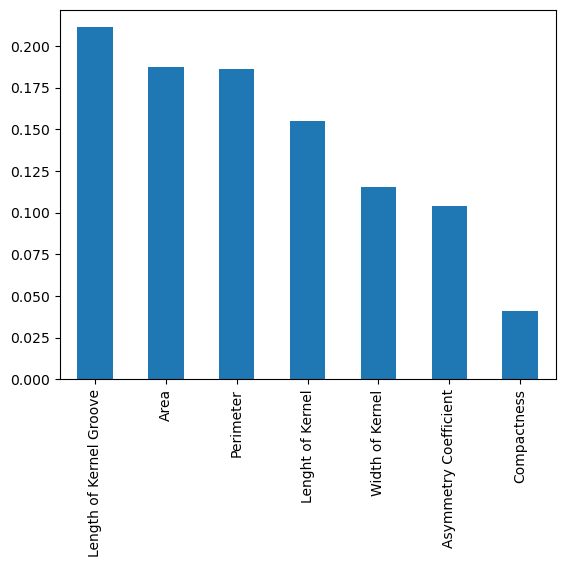

In [5]:
x = seed_data.drop("target", axis=1)
y = np.ravel(seed_data['target'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=12)

rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(x_train, y_train)

feature_importances = pd.Series(rfc1.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

### Evaluation

#### Accuracy

Accuracy: 0.9285714285714286


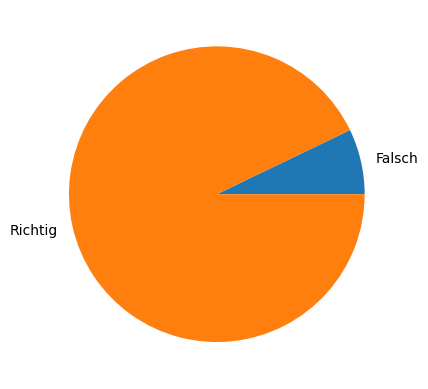

In [6]:
accuracy = rfc1.score(x_test, y_test)
print("Accuracy:", accuracy)


y = np.array([1 - rfc1.score(x_test, y_test), rfc1.score(x_test, y_test)])
mylabels = ["Falsch", "Richtig"]
myexplode = [0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

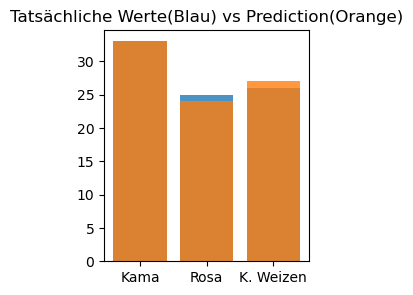

In [7]:
names = ['Kama', 'Rosa', 'K. Weizen']

kama_label = y_test.tolist().count(0)
rosa_label = y_test.tolist().count(1)
kanadian_label = y_test.tolist().count(2)

kama_prediction = rfc1.predict(x_test).tolist().count(0)
rosa_prediction = rfc1.predict(x_test).tolist().count(1)
kanadian_prediction = rfc1.predict(x_test).tolist().count(2)

values_actual = [kama_label,rosa_label,kanadian_label]

values_prediction = [kama_prediction,rosa_prediction,kanadian_prediction]

plt.figure(figsize=(9, 3))



plt.subplot(131)
plt.bar(names, values_actual, alpha=0.8)
plt.subplot(131)
plt.bar(names, values_prediction, alpha=0.8)
plt.title('Tatsächliche Werte(Blau) vs Prediction(Orange)')
plt.show()

In [8]:
print(classification_report(y_test, rfc1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.96      0.92      0.94        25
           2       0.93      0.96      0.94        26

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



In [9]:
print(confusion_matrix(y_test, rfc1.predict(x_test)))

[[30  1  2]
 [ 2 23  0]
 [ 1  0 25]]


### PREPROCESSED

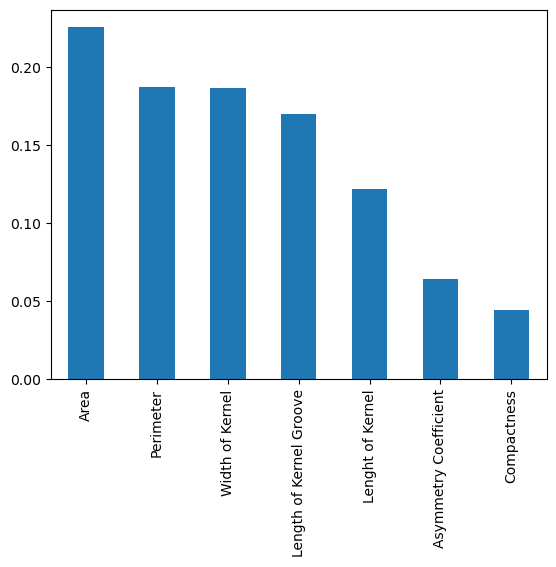

In [10]:
x = preprocessed_seed_data.drop("target", axis=1)
y = np.ravel(preprocessed_seed_data['target'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=12)

rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(x_train, y_train)

feature_importances = pd.Series(rfc2.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

Accuracy: 0.9375


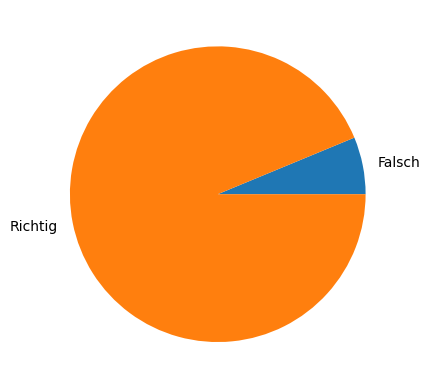

In [11]:
accuracy = rfc2.score(x_test, y_test)
print("Accuracy:", accuracy)


y = np.array([1 - rfc2.score(x_test, y_test), rfc2.score(x_test, y_test)])
mylabels = ["Falsch", "Richtig"]
myexplode = [0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

In [12]:
print(classification_report(y_test, rfc2.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       1.00      1.00      1.00        22
           2       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.95      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



### Klassifikation - Gaussian Naive Bayes

In [13]:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(x_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(x_test)
print(predictive_labels)
print(y_test)
print(gnb.score(x_test, y_test))

[2 0 1 1 1 2 2 2 0 0 0 1 2 0 0 2 2 1 2 1 2 2 0 1 2 1 2 0 2 2 1 2 2 1 1 0 0
 1 1 0 0 0 0 0 2 0 2 0 0 2 2 0 2 0 2 0 2 1 0 2 2 2 1 0 0 2 2 0 0 1 2 0 0 1
 1 2 0 1 1 1]
[2 0 1 1 1 0 2 0 0 0 0 1 2 0 0 2 2 1 2 1 2 2 0 1 2 1 2 0 2 2 1 2 2 1 1 0 0
 1 1 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 2 0 2 1 0 2 2 2 1 0 0 2 0 0 0 1 2 1 0 1
 1 2 0 1 1 1]
0.9125


## 2. SMS-Spam Dataset

Bei diesem Dataset handelt es sich um 5565 individuelle SMS-Nachrichten, die in echte Nachrichten (ham) und Spam-Nachrichten (spam) unterteilt sind. Wir wenden auf dieses Datasat eine Binär-Klassifikation an.

In [14]:

sms_data = pd.read_csv("SMSSpamCollection",sep = "\t", names=["label","text"])

sms_data["length"] = sms_data.text.apply(len)

sms_data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Preprocessing

## 3. Banknoten Authentifizierung Dataset

In [15]:
banknote_data = pd.read_csv("BankNote_Authentication.csv")
banknote_data.groupby("class").describe()

variance                                                                 \
         count      mean       std     min       25%     50%      75%     max   
class                                                                           
0        762.0  2.276686  2.019348 -4.2859  0.883345  2.5531  3.88445  6.8248   
1        610.0 -1.868443  1.881183 -7.0421 -3.061450 -1.8061 -0.54177  2.3917   

      skewness            ...  curtosis          entropy                      \
         count      mean  ...       75%      max   count      mean       std   
class                     ...                                                  
0        762.0  4.256627  ...  2.652925   8.8294   762.0 -1.147640  2.125077   
1        610.0 -0.993576  ...  5.626350  17.9274   610.0 -1.246641  2.070984   

                                                    
          min       25%      50%       75%     max  
class                                               
0     -8.5482 -2.228250 -0.55238  0.423257  2.4495  
1     -7.5887 -2.458375 -0.66165  0.341790  2.1353  

[2 rows x 32 columns]